In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 111.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 144.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 94.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 141.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None


In [5]:
print(df.describe())

         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+04      4.000000        0.000000   
50%    32719.000000   1.100000e+05      9.000000       10.000000   
75%    49078.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e+150     50.000000      100.000000   

       JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  \
count    29393.000000    29411.000000    29450.000000     29448.00000   
mean         7.522140       10.060857       24.343232        22.96522   
std         18.422661       21.833836       27.089360        27.01774   
min          0.000000        0.000000        0.000000         0.00000   
25%          0.000000 

In [6]:
print("\nSummary Statistics for Categorical Columns:")
print(df.describe(include=['object']))


Summary Statistics for Categorical Columns:
                            MainBranch              Age           Employment  \
count                            65437            65437                65437   
unique                               5                8                  110   
top     I am a developer by profession  25-34 years old  Employed, full-time   
freq                             50207            23911                39041   

                                  RemoteWork   Check CodingActivities  \
count                                  54806   65437            54466   
unique                                     3       1              118   
top     Hybrid (some remote, some in-person)  Apples            Hobby   
freq                                   23015   65437             9993   

                                             EdLevel  \
count                                          60784   
unique                                             8   
top     Bachelor’s d

In [8]:
# Step 2: Display the count of missing values per column
missing_values = df.isnull().sum()

print("Missing values per column:\n", missing_values)

Missing values per column:
 ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


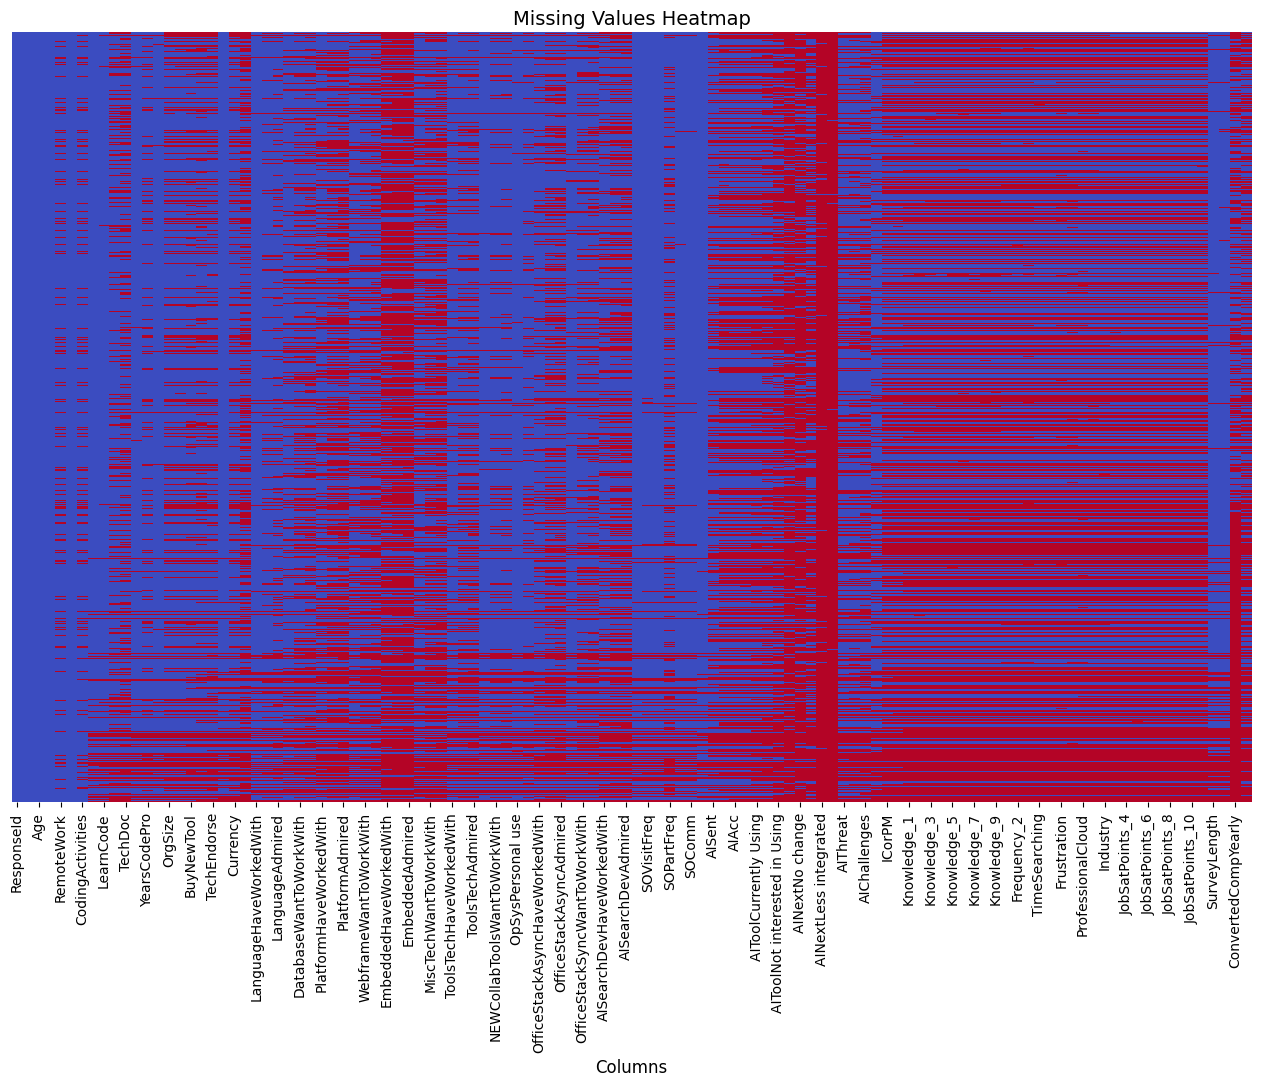

In [10]:
# Step 1: Plot missing values heatmap
plt.figure(figsize=(16,10))
sns.heatmap(df.isnull(), cmap='coolwarm', cbar=False, yticklabels=False)

# Step 2: Customize the plot
plt.title("Missing Values Heatmap", fontsize=14)
plt.xlabel("Columns", fontsize=12)
plt.show()

In [11]:
missing_count = df['Employment'].isnull().sum()

print(f"Number of missing rows in 'Employment': {missing_count}")

Number of missing rows in 'Employment': 0


In [12]:
most_frequent_value = df['Employment'].mode()[0]

print(f"The most frequent value in 'Employment' is: {most_frequent_value}")

The most frequent value in 'Employment' is: Employed, full-time


In [13]:
# Step 1: Identify the most frequent value in the 'Employment' column
most_frequent_value = df['Employment'].mode()[0]

# Step 2: Fill missing values with the most frequent value
df['Employment'].fillna(most_frequent_value, inplace=True)

# Display updated dataset
print("Updated 'Employment' column after imputation:")
print(df)

Updated 'Employment' column after imputation:
       ResponseId                      MainBranch                 Age  \
0               1  I am a developer by profession  Under 18 years old   
1               2  I am a developer by profession     35-44 years old   
2               3  I am a developer by profession     45-54 years old   
3               4           I am learning to code     18-24 years old   
4               5  I am a developer by profession     18-24 years old   
...           ...                             ...                 ...   
65432       65433  I am a developer by profession     18-24 years old   
65433       65434  I am a developer by profession     25-34 years old   
65434       65435  I am a developer by profession     25-34 years old   
65435       65436  I am a developer by profession     18-24 years old   
65436       65437     I code primarily as a hobby     18-24 years old   

                Employment                            RemoteWork   Check  \
0

/tmp/ipykernel_567/3447449855.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Employment'].fillna(most_frequent_value, inplace=True)


/tmp/ipykernel_567/2544388291.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Employment'].fillna(most_frequent_value, inplace=True)
/tmp/ipykernel_567/2544388291.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Employment'], palette='coolwarm')


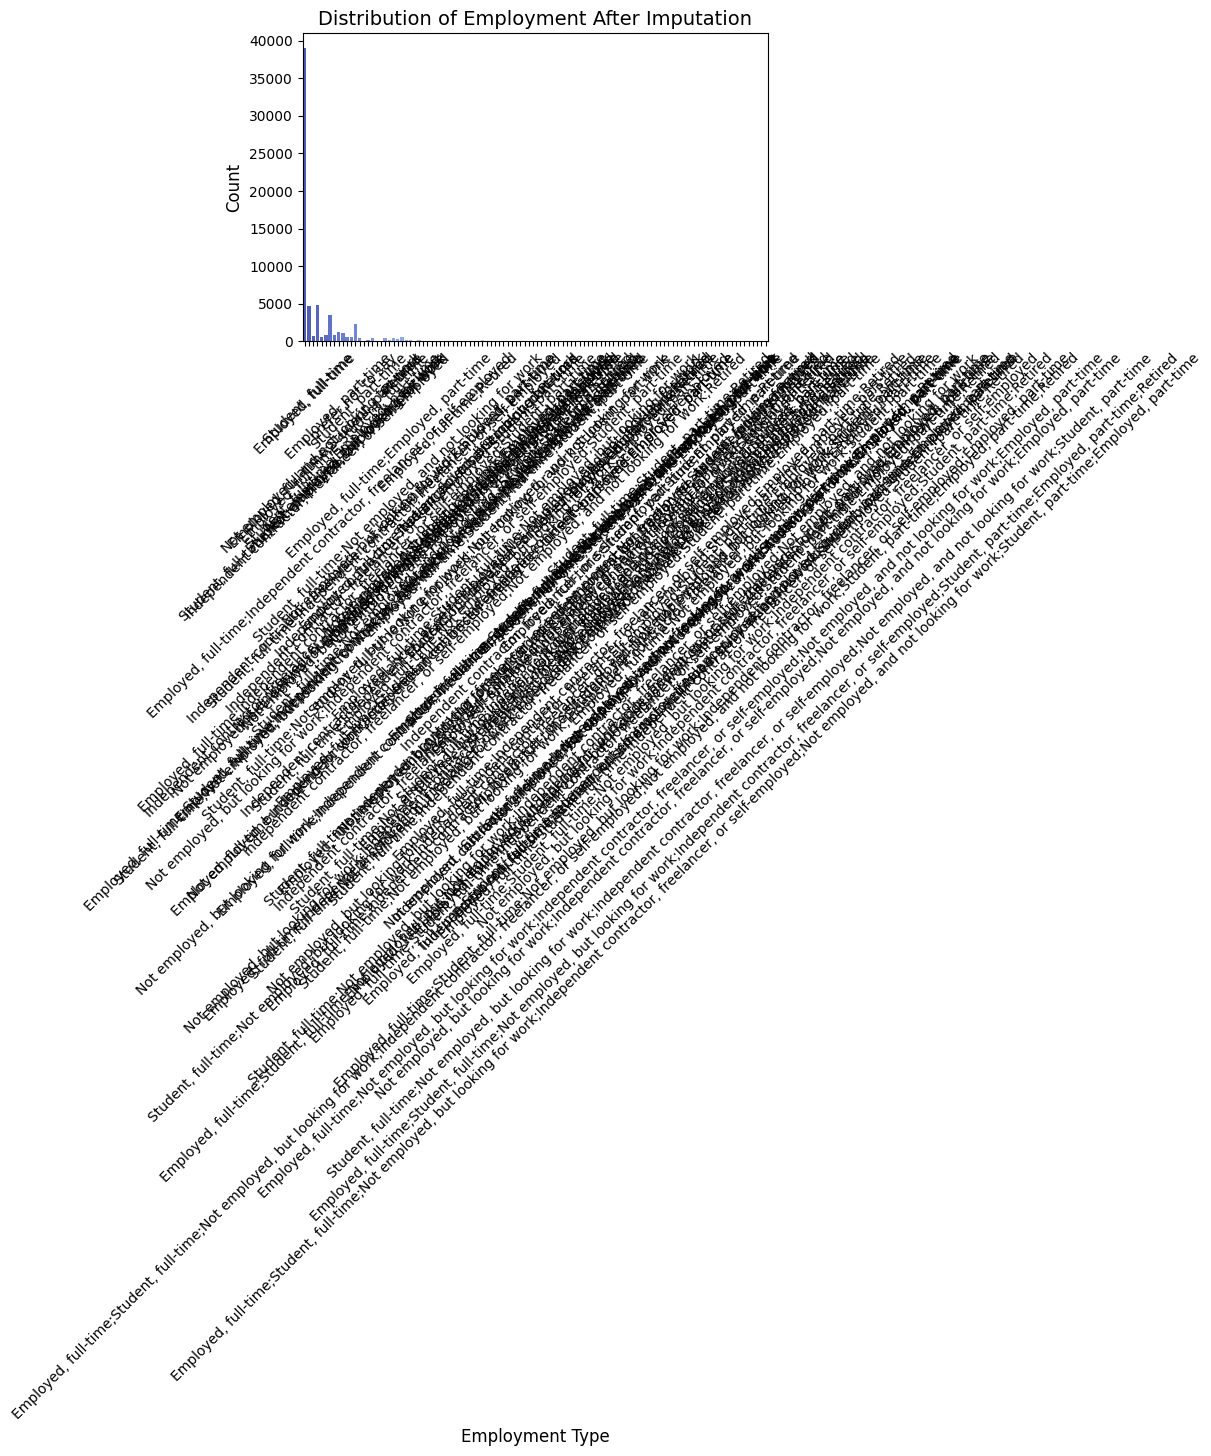

In [14]:
# Step 1: Identify the most frequent value in the 'Employment' column
most_frequent_value = df['Employment'].mode()[0]

# Step 2: Fill missing values with the most frequent value
df['Employment'].fillna(most_frequent_value, inplace=True)

# Step 3: Visualize the distribution of 'Employment' after imputation
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Employment'], palette='coolwarm')

# Customize the plot
plt.title("Distribution of Employment After Imputation", fontsize=14)
plt.xlabel("Employment Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [15]:
#Find the missing values for all columns.

# your code goes here
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.isnull().sum())

SyntaxError: invalid syntax (132314583.py, line 1)